### 讯飞API：场景识别

[官方文档](https://www.xfyun.cn/doc/image/scene-recg/API.html#%E6%8E%A5%E5%8F%A3%E8%AF%B4%E6%98%8E)

#### 两种方法
1. 在请求头设置image_url参数
2. 将图片二进制数据写入请求体中

<br/>

**注：**

1. 若header与body同时设置，以第一种为准
2. 图片大小限制800k

In [6]:
### 方法一

import requests
import time
import hashlib
import base64


# 参数准备
URL = "http://tupapi.xfyun.cn/v1/scene"
APPID = "5ff87169"
API_KEY = "86fe366424526020e33a21c7a3a76017"
ImageName = "ptest05.jpg" # 必填项
# 链接网络图片
ImageUrl = "https://gimg2.baidu.com/image_search/src=http%3A%2F%2Fpic.to8to.com%2Fcase%2F1507%2F10%2F20150710_63bedcf4a35bd39fa67dwfgqs30cxohf.jpg&refer=http%3A%2F%2Fpic.to8to.com&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=jpeg?sec=1612943027&t=19c24b2b12c62e9ed07a35c42af397e2"


def getHeader(image_name, image_url=None):
    curTime = str(int(time.time()))
    param = "{\"image_name\":\"" + image_name + "\",\"image_url\":\"" + image_url + "\"}"
    paramBase64 = base64.b64encode(param.encode('utf-8'))
    tmp = str(paramBase64, 'utf-8')

    m2 = hashlib.md5()
    m2.update((API_KEY + curTime + tmp).encode('utf-8'))
    checkSum = m2.hexdigest()

    header = {
        'X-CurTime': curTime,
        'X-Param': paramBase64,
        'X-Appid': APPID,
        'X-CheckSum': checkSum,
    }
    return header


r = requests.post(URL, headers=getHeader(ImageName, ImageUrl))
result = r.json()
result

{'code': 0,
 'data': {'fileList': [{'label': 1,
    'labels': [1, 5, 20, 2, 18],
    'name': 'https://gimg2.baidu.com/image_search/src=http%3A%2F%2Fpic.to8to.com%2Fcase%2F1507%2F10%2F20150710_63bedcf4a35bd39fa67dwfgqs30cxohf.jpg&refer=http%3A%2F%2Fpic.to8to.com&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=jpeg?sec=1612943027&t=19c24b2b12c62e9ed07a35c42af397e2',
    'rate': 0.5465230345726013,
    'rates': [0.5465230345726013,
     0.31092551350593567,
     0.09876072406768799,
     0.01575404591858387,
     0.01369924284517765],
    'review': True,
    'tag': 'Using url'}],
  'reviewCount': 1,
  'topNStatistic': [{'count': 1, 'label': 1}]},
 'desc': 'success',
 'sid': 'tup00001142@dx680d13574e771aba00'}

In [13]:
### 方法二

import requests
import time
import hashlib
import base64
from PIL import Image


# 参数准备
URL = "http://tupapi.xfyun.cn/v1/scene" #固定连接
APPID = "5ff87169" 
API_KEY = "86fe366424526020e33a21c7a3a76017"
ImageName = "test01.jpg" # 必填参数
ImageUrl = "" # 不必填参数

# 本地图片链接
FilePath = r"C:\Users\Michael\Desktop\API、机器学习与人工智能课程资料\Finalpro_code\ptest05.jpg"

# # 将图片转换为二进制格式
# f = open('ptest05.jpg', 'rb')
# img = base64.b64encode(f.read())

def getHeader(image_name, image_url=None):
    curTime = str(int(time.time()))
    param = "{\"image_name\":\"" + image_name + "\",\"image_url\":\"" + image_url + "\"}"
    paramBase64 = base64.b64encode(param.encode('utf-8'))
    tmp = str(paramBase64, 'utf-8')

    m2 = hashlib.md5()
    m2.update((API_KEY + curTime + tmp).encode('utf-8'))
    checkSum = m2.hexdigest()

    header = {
        'X-CurTime': curTime,
        'X-Param': paramBase64,
        'X-Appid': APPID,
        'X-CheckSum': checkSum,
    }
    return header


def getBody(filePath):
    binfile = open(filePath, 'rb')
    data = binfile.read()
    return data


r = requests.post(URL,data=getBody(FilePath), headers=getHeader(ImageName, ImageUrl))
result = r.json()
result

{'code': 0,
 'data': {'fileList': [{'label': 9,
    'labels': [9, 3, 11, 18, 10],
    'name': 'test01.jpg',
    'rate': 0.9986672401428223,
    'rates': [0.9986672401428223,
     0.0010075508616864681,
     0.0002714783186092973,
     3.254865441704169e-05,
     1.3011311239097267e-05],
    'review': False}],
  'reviewCount': 0,
  'topNStatistic': [{'count': 1, 'label': 9}]},
 'desc': 'success',
 'sid': 'tup000011d5@dxb9d81358500b000100'}

In [14]:
### 爬取接口返回参数说明表格

#导入pandas模块
import pandas as pd
#网页链接
url = "https://www.xfyun.cn/doc/image/scene-recg/API.html#%E6%8E%A5%E5%8F%A3%E8%BF%94%E5%9B%9E%E5%8F%82%E6%95%B0"
#header=0指定列标题所在的行为第0行，encoding="utf-8"中文字符编码，不添加可能会出现乱码
df_table = pd.read_html(url, encoding="utf-8", header=0)
df_table

HTTPError: HTTP Error 403: Forbidden

#### 因为权限不足，讯飞文档爬不下来，这里将对参数结果进行说明

```
{'code': 0,
 'data': {'fileList': [{'label': 9,
    'labels': [9, 3, 11, 18, 10],
    'name': 'test01.jpg',
    'rate': 0.9986672401428223,
    'rates': [0.9986672401428223,
     0.0010075508616864681,
     0.0002714783186092973,
     3.254865441704169e-05,
     1.3011311239097267e-05],
    'review': False}],
  'reviewCount': 0,
  'topNStatistic': [{'count': 1, 'label': 9}]},
 'desc': 'success',
 'sid': 'tup000011d5@dxb9d81358500b000100'}
```
<br/>

|参数|返回值|说明|
| --- | --- | --- |
|label|9| 对应场景：山峰|
|labels|9,3,11,18,10|表示前5个最可能场景的label，分别是山峰，草地，森林，其他场景，湖|
|rate|0.99|介于0-1间的浮点数，表示该图像被识别为某个分类的概率值，概率越高、机器越肯定|
|rates|0.99,0.001,0.0002,3.25,1.3|labels对应，前5个最可能场景对应得分|
|review|False|返回true时存在偏差，可信度较低，返回false时可信度较高|

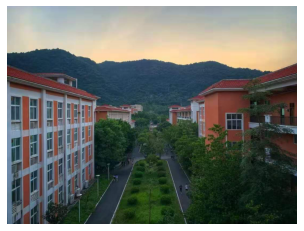

In [16]:
# 显示本地所分析的图片

import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np
 
lena = mpimg.imread('ptest05.jpg') # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
lena.shape #(512, 512, 3)
 
plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

### 讯飞API：物体识别

[官方文档](https://www.xfyun.cn/doc/image/object-recg/API.html#%E6%8E%A5%E5%8F%A3%E8%AF%B7%E6%B1%82%E5%8F%82%E6%95%B0)


**与场景识别操作方法相同**

In [23]:
import requests
import time
import hashlib
import base64


URL = "http://tupapi.xfyun.cn/v1/currency"
APPID = "5ff87169"
API_KEY = "86fe366424526020e33a21c7a3a76017"
ImageName = "stest02.jpg" # 必填项
ImageUrl = ""

# 本地图片链接
FilePath = r"C:\Users\Michael\Desktop\API、机器学习与人工智能课程资料\Finalpro_code\stest02.jpg"


def getHeader(image_name, image_url=None):
    curTime = str(int(time.time()))
    param = "{\"image_name\":\"" + image_name + "\",\"image_url\":\"" + image_url + "\"}"
    paramBase64 = base64.b64encode(param.encode('utf-8'))
    tmp = str(paramBase64, 'utf-8')

    m2 = hashlib.md5()
    m2.update((API_KEY + curTime + tmp).encode('utf-8'))
    checkSum = m2.hexdigest()

    header = {
        'X-CurTime': curTime,
        'X-Param': paramBase64,
        'X-Appid': APPID,
        'X-CheckSum': checkSum,
    }
    return header


def getBody(filePath):
    binfile = open(filePath, 'rb')
    data = binfile.read()
    return data


r = requests.post(URL,data=getBody(FilePath),headers=getHeader(ImageName, ImageUrl))
result = r.json()
result

{'code': 0,
 'data': {'fileList': [{'label': 19903,
    'labels': [19903, 18881, 1314, 4760, 3042],
    'name': 'stest02.jpg',
    'rate': 0.26318418979644775,
    'rates': [0.26318418979644775,
     0.043663863092660904,
     0.03755110874772072,
     0.027026833966374397,
     0.023022780194878578],
    'review': True}],
  'reviewCount': 1,
  'topNStatistic': [{'count': 1, 'label': 19903}]},
 'desc': 'success',
 'sid': 'tup000011dc@dx680d13585d5b1aba00'}

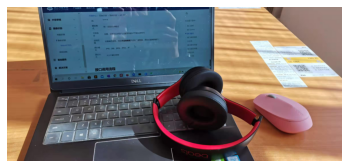

In [24]:
# 显示本地所分析的图片

import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np
 
lena = mpimg.imread('stest02.jpg') # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
lena.shape #(512, 512, 3)
 
plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

### 读取返回参数对应数据excel表

In [22]:
import numpy as np
import pandas as pd
dataset=pd.read_excel('物体识别label返回值02.xlsx', encoding = "utf8", sep="\t")
dataset

,label值,英文,中文,分类
0,0,zabaglione,意大利甜点，蛋奶冻,食品
1,1,zairese,扎伊尔人,人类
2,2,zamboni,赞博尼磨冰机,用品
3,3,zamia,泽米属植物,植物
4,4,zebra,斑马,动物
...,...,...,...,...
20062,20062,mysore-thorn,黏剌,植物
20063,20063,mystic,神秘主义者,人物
20064,20064,mythologist,神话学者,人物
20065,20065,myxobacteria,粘丝菌,生物


### 返回参数说明
```
{'code': 0,
 'data': {'fileList': [{'label': 19903,
    'labels': [19903, 18881, 1314, 4760, 3042],
    'name': 'stest02.jpg',
    'rate': 0.26318418979644775,
    'rates': [0.26318418979644775,
     0.043663863092660904,
     0.03755110874772072,
     0.027026833966374397,
     0.023022780194878578],
    'review': True}],
  'reviewCount': 1,
  'topNStatistic': [{'count': 1, 'label': 19903}]},
 'desc': 'success',
 'sid': 'tup000011dc@dx680d13585d5b1aba00'}
```

<br/>

|参数|返回值|说明|
| --- | --- | --- |
|label|19903| 对应物体：老鼠；分类：物品|
|labels|19903, 18881, 1314, 4760, 3042|表示前5个最可能场景的label，分别是老鼠，笔记本，无线局域网络，外围设备，计算机鼠标|
|rate|0.26|介于0-1间的浮点数，表示该图像被识别为某个分类的概率值，概率越高、机器越肯定|
|rates|0.26,0.043,0.037,0.027,0.023|labels对应，前5个最可能场景对应得分|
|review|True|返回true时存在偏差，可信度较低，返回false时可信度较高|